**Data Cleanning**

In [248]:
#Import all relevant libraries
import pandas as pd
import numpy as np

In [249]:
#read in data into pandas dataframe
data = pd.read_csv('all_schools_all_semesters.csv')
data.head()

,student_id,term,academicriskscore,engagementriskscore,financialriskscore,beliefriskscore,overallriskscore,whydidyouchoosethisschool,areyouthefirstpersoninyourfamily,pleasespecifyyourraceethnicity,...,sport,eligterm,overallrisk,academic,engagement,financial,wellness,response_created,year,returnedfall2019
0,1.0,spring 2019,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,fall 2018,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,fall 2019,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,fall 2019,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,spring 2019,2.0,12.0,4.0,0.0,18.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
#Drop variables
variables_to_drop = ['academicriskscore', 'engagementriskscore', 'financialriskscore', 'beliefriskscore',
                     'overallriskscore', 'wellnessriskscore', 'gnumber', 'id', 'ethnic_group_tr', 
                     'residency', 'citizenship', 'um_acad_prog1', 'um_acad_plan1', 'actcomposite', 
                     'hispanic', 'nonresalien', 'americanindian', 'asian', 'black', 'pacific', 'white',
                     'actionrsn', 'advisor', 'sport', 'eligterm', 'overallrisk', 'academic', 'engagement',
                     'financial', 'wellness', 'response_created', 'year', 'returnedfall2019']

data = data.drop(variables_to_drop, 1)

In [251]:
#Drop students with no survey responses
data = data.dropna(subset=['doyouliveoncampus'])
data.shape[0]

2855

In [252]:
#Drop duplicate variables
data.drop_duplicates(subset=['student_id', 'term', 'school'], inplace = True)

data.shape[0]

2845

In [253]:
#check if we have any duplicated instance
duplicateRowsDF = data[data.duplicated(['student_id', 'term', 'school'])]

assert(duplicateRowsDF.shape[0] == 0)

In [254]:
#check how many dropouts we have and replace missing values with 0
data['dropout'] = data['dropout'].fillna(0)
data['dropout'].value_counts()

0.0    2814
1.0      31
Name: dropout, dtype: int64

In [255]:
#Check if we havce dropouts for each school
data[['school', 'dropout']].groupby(['school']).agg(['mean', 'std', 'count'])

dropout                
            mean       std count
school                          
1       0.000000  0.000000  1748
2       0.006378  0.079655   784
3       0.083067  0.276426   313

In [256]:
#Check if we havce dropouts for each term
data[['term', 'dropout']].groupby(['term']).agg(['mean', 'std', 'count'])

dropout                
                 mean       std count
term                                 
fall 2018    0.000000  0.000000   611
fall 2019    0.003040  0.055065  1645
spring 2019  0.044143  0.205586   589

In [257]:
#Create two columns for semseter and a year and drop original term variable
data[['Semester','Year']] = data.term.str.split(expand=True) 
data = data.drop('term',1)
data.head()

,student_id,whydidyouchoosethisschool,areyouthefirstpersoninyourfamily,pleasespecifyyourraceethnicity,doyouliveoncampus,doyouhaveanymajorfamilycommitmen,haveyoumetwithyouradvisororhavea,howlikelyareyoutorecommendyourun,iaminterestedinthecoursesthatiam,mycourseloadistoochallenging,...,igetmorethan7hoursofsleeponmostn,ithinkthatiwillbesuccessfulatthi,howlikelyareyoutorecommendyoursc,willyoubeworking20hoursaweekormo,whichofthefollowingbestdescribes,doyouhavechildren,areyouanathlete,dropout,Semester,Year
4,3.0,NaN,NaN,NaN,No,No,Yes,10.0,Agree,Somewhat agree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,spring,2019
5,3.0,Because it is close to work/home,No,White,No,No,Yes,10.0,Agree,Disagree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,fall,2018
6,4.0,It was the most affordable option,No,Black or African American,Yes,No,Yes,NaN,Agree,Disagree,...,Somewhat agree,Strongly agree,6.0,No,To get a better job or make more money,No,No,0.0,fall,2019
8,5.0,NaN,NaN,NaN,Yes,No,Yes,6.0,Somewhat agree,Disagree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,spring,2019
9,5.0,Other,Yes,Two or more races,Yes,No,No,7.0,Somewhat Agree,Disagree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,fall,2018


In [258]:
#Combine identical Questions
data['howlikelyareyoutorecommendyourun'].astype(float)
data.loc[data['howlikelyareyoutorecommendyoursc'] == 0, 'howlikelyareyoutorecommendyoursc'] = 1

data.howlikelyareyoutorecommendyoursc = np.where(data.howlikelyareyoutorecommendyoursc.isnull(), data.howlikelyareyoutorecommendyourun, data.howlikelyareyoutorecommendyoursc)
data = data.drop('howlikelyareyoutorecommendyourun',1)

data.iamscaredoffailingoneormoreofmyc = np.where(data.iamscaredoffailingoneormoreofmyc.isnull(), data.iamscaredoffailingmorethanoneofm, data.iamscaredoffailingoneormoreofmyc)
data = data.drop('iamscaredoffailingmorethanoneofm',1)

In [259]:
#Create a list of lakert scale and one_hot variables
lakirt = ['iaminterestedinthecoursesthatiam', 'mycourseloadistoochallenging', 'iamscaredoffailingoneormoreofmyc',
          'thecoursesthatiamtakingwillhelpm', 'iamconfidentthatiwillgraduateint', 'myparentsrelativessupportmefinan',
          'istruggletopayfortextbooksrentut', 'iworryalotaboutpayingforschool', 'iwouldbenefitfromhelpmanagingmyf',
          'iamconsideringtakingabreakfromsc', 'ifeellikeifitintomyschool', 'ifihaveanissueihavesomeonetoreac',
          'ioftenattendeventsorganizedbyacl', 'partyinggetsinthewayofmedoingwel', 'wheniwasinhighschoolialwaysknewi',
          'ibelievethatacollegedegreeisvalu', 'iwasexcitedtoseemyfriendswhenica', 'mysociallifegetsinthewayofmedoin',
          'iexerciseatleasttwiceaweek', 'igetmorethan7hoursofsleeponmostn', 'ithinkthatiwillbesuccessfulatthi'
          ]

one_hot = ['whydidyouchoosethisschool', 'areyouthefirstpersoninyourfamily', 'pleasespecifyyourraceethnicity', 
           'doyouliveoncampus', 'doyouhaveanymajorfamilycommitmen', 'haveyoumetwithyouradvisororhavea', 
           'withwhatgenderdoyouidentify', 'didyoufailoneormoreofyourcourses', 'willyoubeworking20hoursaweekormo', 
           'whichofthefollowingbestdescribes', 'doyouhavechildren', 'areyouanathlete', 'iampayingforcollegeoutofpocketbu'    
          ] 

In [260]:
#capitalize lakirt variables to treat Strongly disagree and Strongly Disagree as same
data['balancingworkandschoolistoostres'] = data['balancingworkandschoolistoostres'].map(lambda x : x.capitalize() if isinstance(x,str) else x)

In [261]:
data[lakirt] = data[lakirt].applymap(lambda x :x.capitalize() if isinstance(x,str) else x)

In [262]:
#fill gender and race by student id and school
data['pleasespecifyyourraceethnicity'] = data.sort_values(['student_id', 'school', 'pleasespecifyyourraceethnicity']).groupby(['student_id', 'school'])['pleasespecifyyourraceethnicity'].ffill()

In [263]:
data['withwhatgenderdoyouidentify'] = data.sort_values(['student_id', 'school', 'withwhatgenderdoyouidentify']).groupby(['student_id', 'school'])['withwhatgenderdoyouidentify'].ffill()

In [264]:
#combine similar responses
data['whydidyouchoosethisschool'] = np.where(data['whydidyouchoosethisschool'] == 'It has a good academic reputation', 'Because of its academic reputation', data['whydidyouchoosethisschool'])
data['whydidyouchoosethisschool'] = np.where(data['whydidyouchoosethisschool'] == 'It is close to work/home', 'Because it is close to work/home', data['whydidyouchoosethisschool'])
data['whydidyouchoosethisschool'] = np.where(data['whydidyouchoosethisschool'] == 'Because the schoolâs classes fit with my work schedule', 'It offers classes that fit my work schedule', data['whydidyouchoosethisschool'])

In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2845 entries, 4 to 6522
Data columns (total 41 columns):
student_id                          2845 non-null float64
whydidyouchoosethisschool           2445 non-null object
areyouthefirstpersoninyourfamily    2445 non-null object
pleasespecifyyourraceethnicity      2845 non-null object
doyouliveoncampus                   2845 non-null object
doyouhaveanymajorfamilycommitmen    2845 non-null object
haveyoumetwithyouradvisororhavea    2845 non-null object
iaminterestedinthecoursesthatiam    2845 non-null object
mycourseloadistoochallenging        2845 non-null object
iamscaredoffailingoneormoreofmyc    2845 non-null object
thecoursesthatiamtakingwillhelpm    2845 non-null object
iamconfidentthatiwillgraduateint    2845 non-null object
myparentsrelativessupportmefinan    2845 non-null object
istruggletopayfortextbooksrentut    2845 non-null object
iworryalotaboutpayingforschool      2845 non-null object
iwouldbenefitfromhelpmanagingmyf    1

In [266]:
data.columns

Index(['student_id', 'whydidyouchoosethisschool',
       'areyouthefirstpersoninyourfamily', 'pleasespecifyyourraceethnicity',
       'doyouliveoncampus', 'doyouhaveanymajorfamilycommitmen',
       'haveyoumetwithyouradvisororhavea', 'iaminterestedinthecoursesthatiam',
       'mycourseloadistoochallenging', 'iamscaredoffailingoneormoreofmyc',
       'thecoursesthatiamtakingwillhelpm', 'iamconfidentthatiwillgraduateint',
       'myparentsrelativessupportmefinan', 'istruggletopayfortextbooksrentut',
       'iworryalotaboutpayingforschool', 'iwouldbenefitfromhelpmanagingmyf',
       'balancingworkandschoolistoostres', 'iamconsideringtakingabreakfromsc',
       'ifeellikeifitintomyschool', 'ifihaveanissueihavesomeonetoreac',
       'ioftenattendeventsorganizedbyacl', 'partyinggetsinthewayofmedoingwel',
       'wheniwasinhighschoolialwaysknewi', 'ibelievethatacollegedegreeisvalu',
       'school', 'withwhatgenderdoyouidentify',
       'didyoufailoneormoreofyourcourses', 'iampayingforcollege

In [267]:
cat_features = ['whydidyouchoosethisschool',
       'areyouthefirstpersoninyourfamily', 'pleasespecifyyourraceethnicity',
       'doyouliveoncampus', 'doyouhaveanymajorfamilycommitmen',
       'haveyoumetwithyouradvisororhavea', 'iaminterestedinthecoursesthatiam',
       'mycourseloadistoochallenging', 'iamscaredoffailingoneormoreofmyc',
       'thecoursesthatiamtakingwillhelpm', 'iamconfidentthatiwillgraduateint',
       'myparentsrelativessupportmefinan', 'istruggletopayfortextbooksrentut',
       'iworryalotaboutpayingforschool', 'iwouldbenefitfromhelpmanagingmyf',
       'balancingworkandschoolistoostres', 'iamconsideringtakingabreakfromsc',
       'ifeellikeifitintomyschool', 'ifihaveanissueihavesomeonetoreac',
       'ioftenattendeventsorganizedbyacl', 'partyinggetsinthewayofmedoingwel',
       'wheniwasinhighschoolialwaysknewi', 'ibelievethatacollegedegreeisvalu',
        'withwhatgenderdoyouidentify',
       'didyoufailoneormoreofyourcourses', 'iampayingforcollegeoutofpocketbu',
       'iwasexcitedtoseemyfriendswhenica', 'mysociallifegetsinthewayofmedoin',
       'iexerciseatleasttwiceaweek', 'igetmorethan7hoursofsleeponmostn',
       'ithinkthatiwillbesuccessfulatthi', 'howlikelyareyoutorecommendyoursc',
       'willyoubeworking20hoursaweekormo', 'whichofthefollowingbestdescribes',
       'doyouhavechildren', 'areyouanathlete']

data_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_unique', 'values_count_unique_nona', 
                                       'num_miss', 'pct_miss'])
tmp = pd.DataFrame()

for c in cat_features:
    tmp['column'] = [c]
    tmp['values'] = [data[c].unique()]
    tmp['values_count_unique'] = len(list(data[c].unique()))
    tmp['values_count_unique_nona'] = int(data[c].nunique())
    tmp['num_miss'] = data[c].isnull().sum()
    tmp['pct_miss'] = (data[c].isnull().sum()/ len(data)).round(3)*100
    data_stats = data_stats.append(tmp)
    
data_stats

,column,values,values_count_unique,values_count_unique_nona,num_miss,pct_miss
0,whydidyouchoosethisschool,"[nan, Because it is close to work/home, It was...",7,6,400,14.1
0,areyouthefirstpersoninyourfamily,"[nan, No, Yes]",3,2,400,14.1
0,pleasespecifyyourraceethnicity,"[White, Black or African American, Two or more...",7,7,0,0.0
0,doyouliveoncampus,"[No, Yes]",2,2,0,0.0
0,doyouhaveanymajorfamilycommitmen,"[No, Yes]",2,2,0,0.0
0,haveyoumetwithyouradvisororhavea,"[Yes, No]",2,2,0,0.0
0,iaminterestedinthecoursesthatiam,"[Agree, Somewhat agree, Strongly agree, Disagr...",5,5,0,0.0
0,mycourseloadistoochallenging,"[Somewhat agree, Disagree, Agree, Strongly dis...",5,5,0,0.0
0,iamscaredoffailingoneormoreofmyc,"[Strongly disagree, Disagree, Strongly agree, ...",5,5,0,0.0
0,thecoursesthatiamtakingwillhelpm,"[Agree, Strongly agree, Somewhat agree, Disagr...",5,5,0,0.0


/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


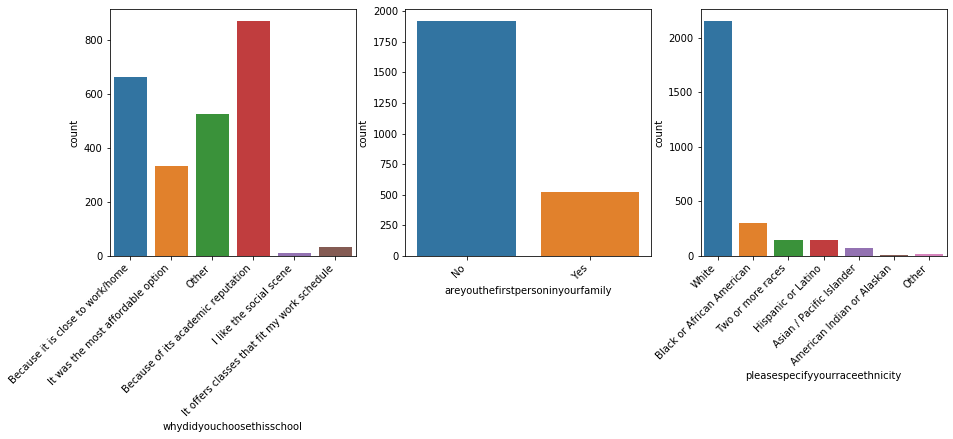

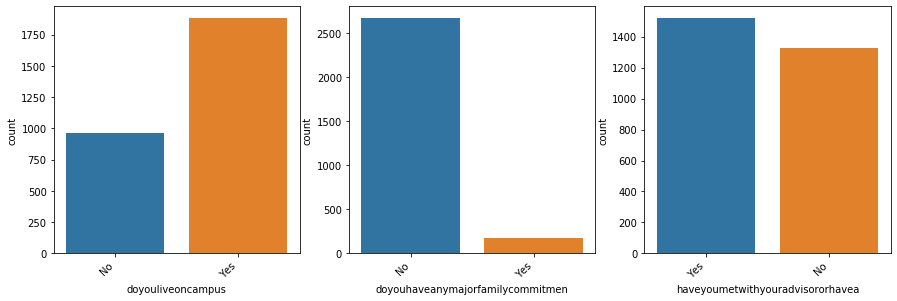

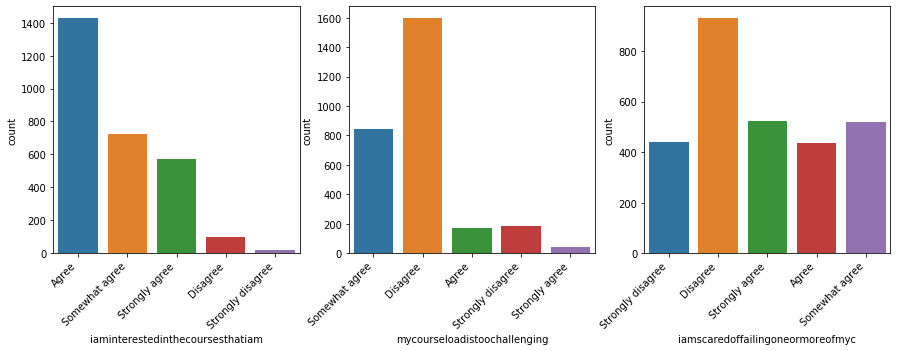

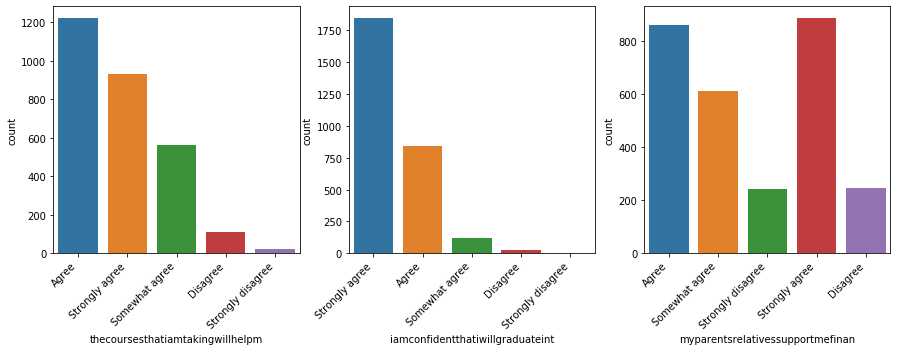

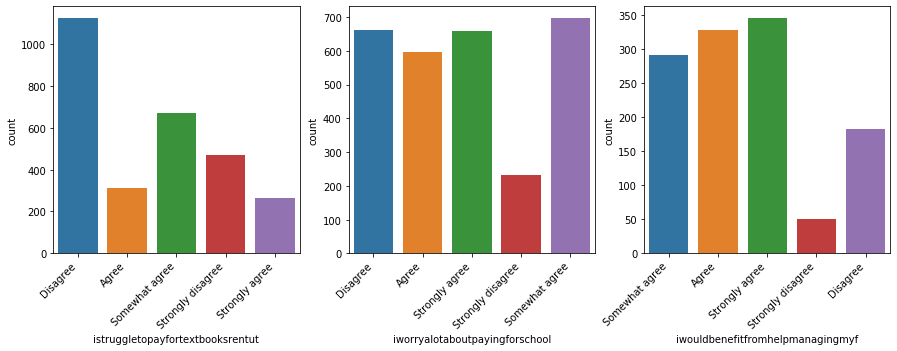

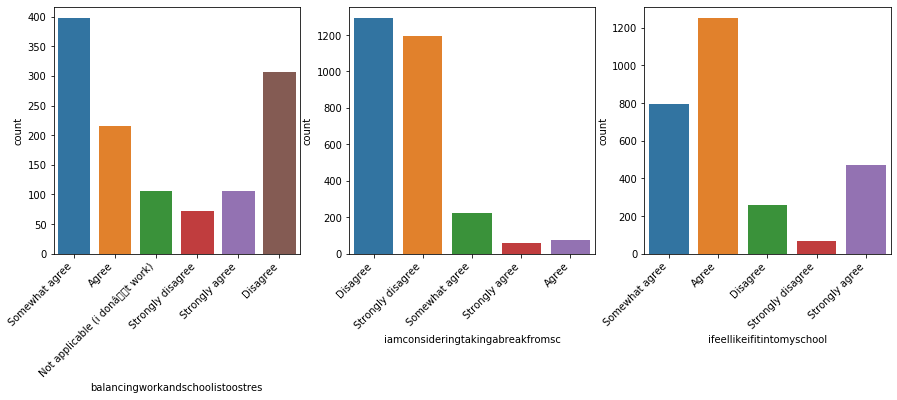

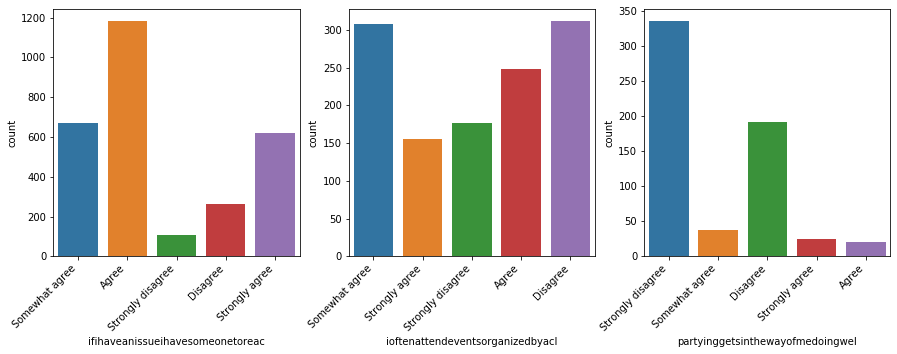

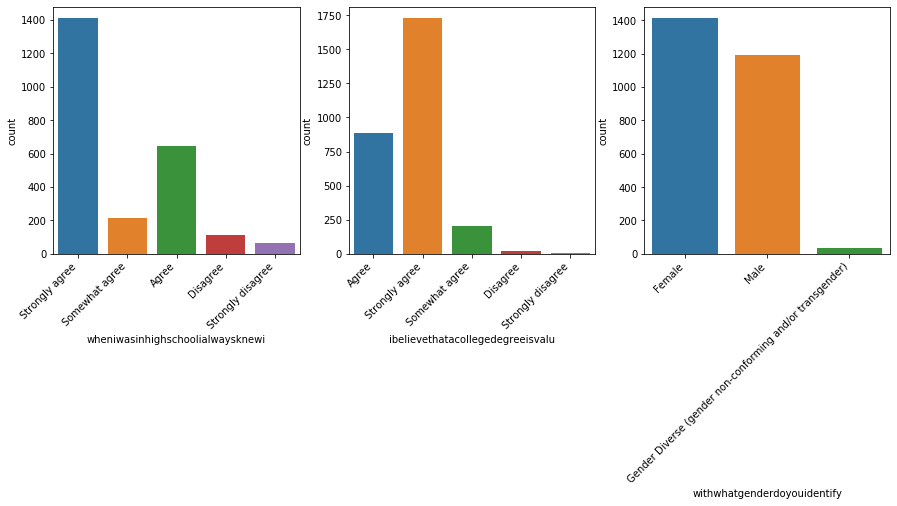

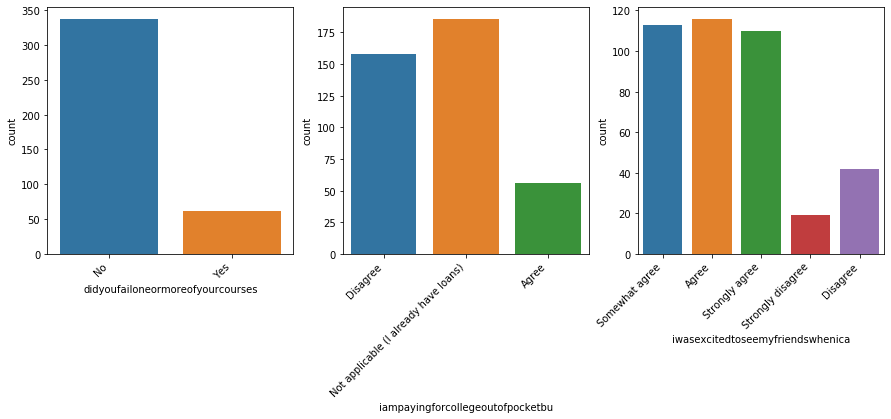

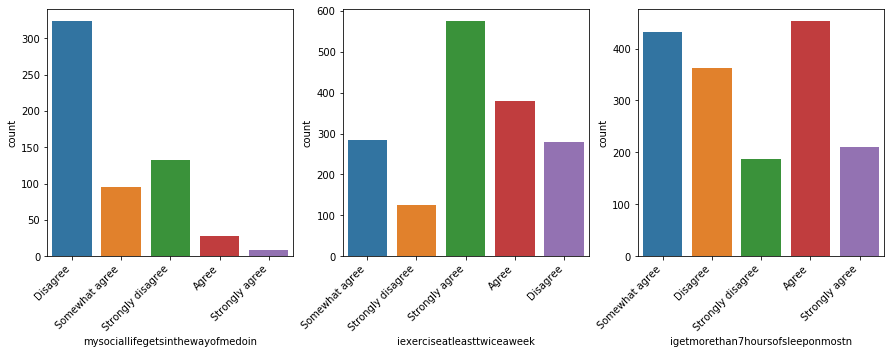

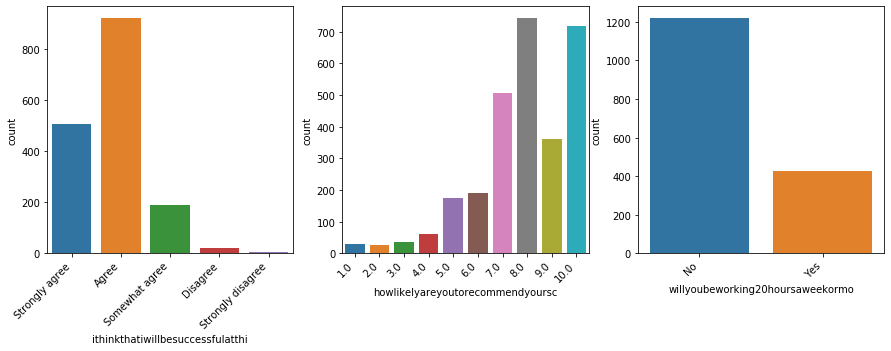

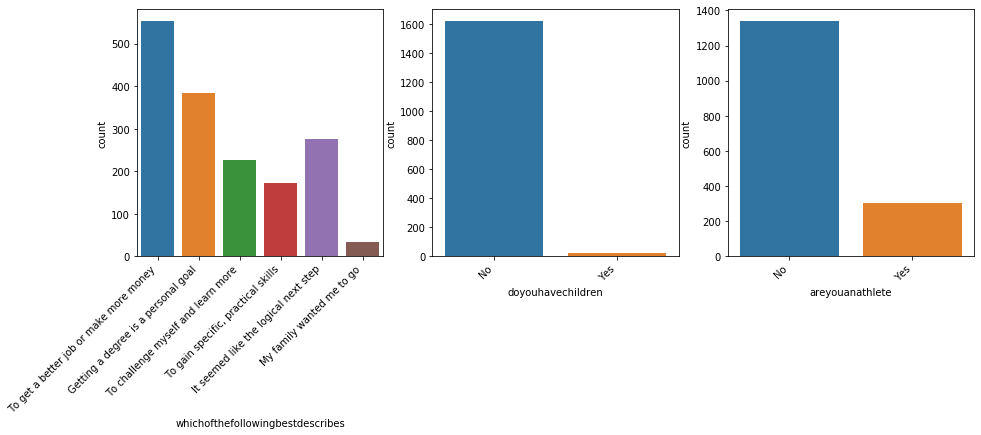

<Figure size 1080x720 with 0 Axes>

In [268]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
ix = 1
fig = plt.figure(figsize = (15,10))

for c in cat_features:
    if ix <= 3:
        ax1 = fig.add_subplot(2,3,ix)
        sns.countplot(data = data, x=c, ax = ax1)
        ax2 = fig.add_subplot(2,3,ix)
            
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
         )       
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1


In [269]:
data_crosstab = pd.crosstab(data['willyoubeworking20hoursaweekormo'], data['whichofthefollowingbestdescribes'])
data_crosstab     

whichofthefollowingbestdescribes,Getting a degree is a personal goal,It seemed like the logical next step,My family wanted me to go,To challenge myself and learn more,"To gain specific, practical skills",To get a better job or make more money
willyoubeworking20hoursaweekormo,,,,,,
No,251,228,17,179,128,417
Yes,132,49,17,47,44,136


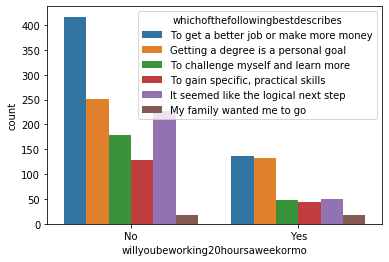

In [270]:
sns.countplot(x='willyoubeworking20hoursaweekormo', hue='whichofthefollowingbestdescribes', data = data)

In [271]:
import scipy.stats as ss
def cramers_v(x, y):
    if pd.crosstab(x,y).shape[0]!= 0:
        confusion_matrix = pd.crosstab(x,y)
        chi2 = ss.chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum()
        phi2 = chi2/n
        r,k = confusion_matrix.shape
        phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
        rcorr = r-((r-1)**2)/(n-1)
        kcorr = k-((k-1)**2)/(n-1)
        return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [272]:
data_dict = {'feature_1': [],
'feature_2': [],
'cramers': []}
for x in cat_features:
    for y in cat_features:
        data_dict['feature_1'].append(x)
        data_dict['feature_2'].append(y)
        data_dict['cramers'].append(cramers_v(data[x],data[y]))

In [273]:
cramers_result = pd.DataFrame(data_dict)

In [274]:
cramers_result = cramers_result.dropna()

In [275]:
pivoted_data = cramers_result.pivot_table(index = 'feature_1', columns = ['feature_2'],values ='cramers')

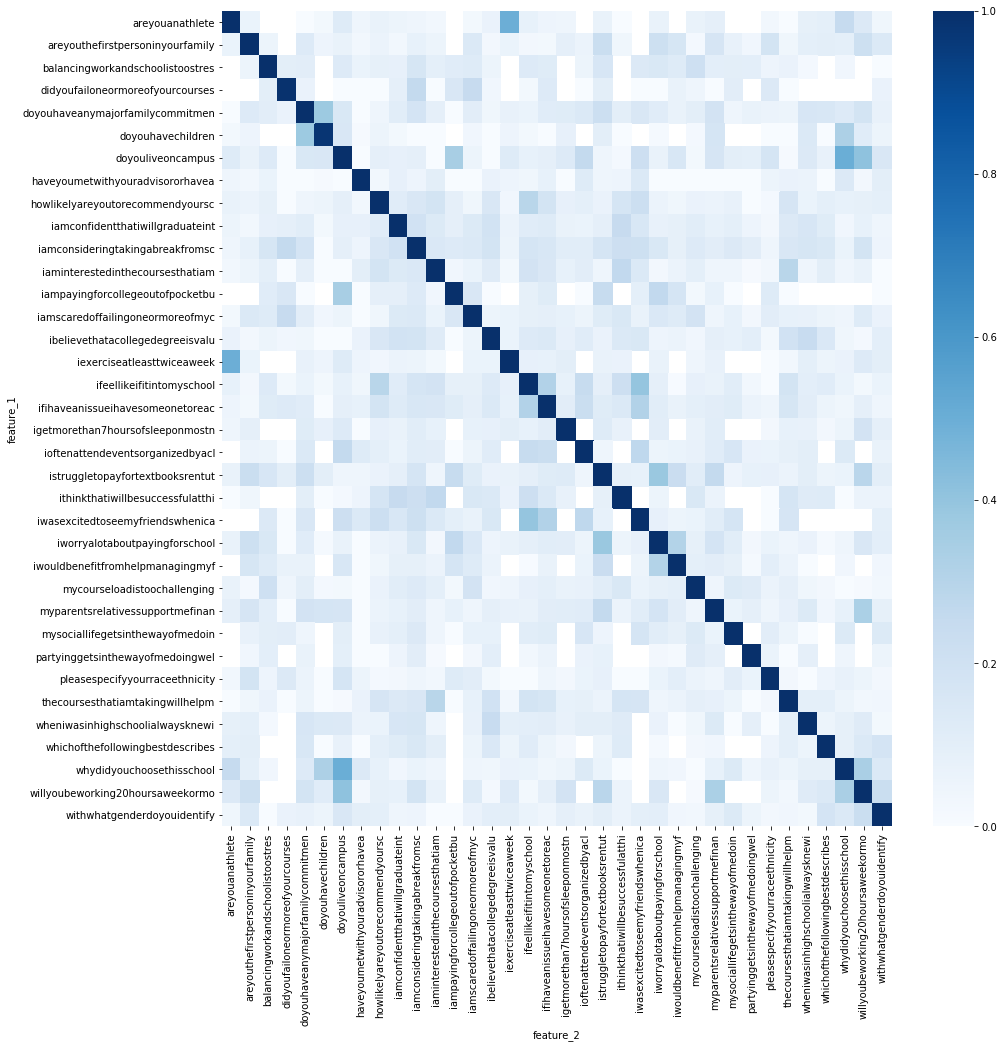

In [276]:
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(pivoted_data, cmap="Blues")

In [277]:
#fill missing lakirt variables
data[lakirt] = data[lakirt].fillna('Missing')

In [278]:
#Create a flag for missing lakirt variables
for i in lakirt:
    if 'Missing' in data[i].values:
        data[i+'_mv'] = (data[i] == 'Missing').astype(int) 

data.head()

,student_id,whydidyouchoosethisschool,areyouthefirstpersoninyourfamily,pleasespecifyyourraceethnicity,doyouliveoncampus,doyouhaveanymajorfamilycommitmen,haveyoumetwithyouradvisororhavea,iaminterestedinthecoursesthatiam,mycourseloadistoochallenging,iamscaredoffailingoneormoreofmyc,...,Year,iwouldbenefitfromhelpmanagingmyf_mv,ioftenattendeventsorganizedbyacl_mv,partyinggetsinthewayofmedoingwel_mv,wheniwasinhighschoolialwaysknewi_mv,iwasexcitedtoseemyfriendswhenica_mv,mysociallifegetsinthewayofmedoin_mv,iexerciseatleasttwiceaweek_mv,igetmorethan7hoursofsleeponmostn_mv,ithinkthatiwillbesuccessfulatthi_mv
4,3.0,NaN,NaN,White,No,No,Yes,Agree,Somewhat agree,Strongly disagree,...,2019,0,0,1,1,0,0,1,1,1
5,3.0,Because it is close to work/home,No,White,No,No,Yes,Agree,Disagree,Disagree,...,2018,0,0,0,0,1,1,1,1,1
6,4.0,It was the most affordable option,No,Black or African American,Yes,No,Yes,Agree,Disagree,Strongly agree,...,2019,1,1,1,0,1,1,0,0,0
8,5.0,NaN,NaN,Two or more races,Yes,No,Yes,Somewhat agree,Disagree,Agree,...,2019,0,0,1,1,0,0,1,1,1
9,5.0,Other,Yes,Two or more races,Yes,No,No,Somewhat agree,Disagree,Disagree,...,2018,0,0,0,0,1,1,1,1,1


In [279]:
#seperately encode balncing work and school is stressful variable and generate work variable based on responses
data['balancingworkandschoolistoostres'] = data['balancingworkandschoolistoostres'].fillna('Missing')

In [280]:
if 'Missing' in data['balancingworkandschoolistoostres'].values:
    data['balancingworkandschoolistoostres'+'_mv'] = (data['balancingworkandschoolistoostres'] == 'Missing').astype(int) 

In [281]:
if 'Not applicable (i donât work)' in data['balancingworkandschoolistoostres'].values:
    data['not_work'] = (data['balancingworkandschoolistoostres'] == 'Not applicable (i donât work)').astype(int) 

In [282]:
data['work'] = (data['balancingworkandschoolistoostres'+'_mv'] == 0) & (data['not_work'] == 0)

In [283]:
data['work'] = data['work'].astype(int)

In [284]:
data['work'].value_counts()

0    1750
1    1095
Name: work, dtype: int64

In [285]:
data['balancingworkandschoolistoostres'].value_counts()

Missing                            1645
Somewhat agree                      397
Disagree                            306
Agree                               215
Strongly agree                      105
Not applicable (i donât work)     105
Strongly disagree                    72
Name: balancingworkandschoolistoostres, dtype: int64

In [286]:
ord_map = {'Strongly disagree': 1, 'Disagree': 2, 
               'Missing': 4, 'Somewhat agree': 5, 'Agree': 6, 'Strongly agree': 7, 'Not applicable (i donât work)': 4}

data['balancingworkandschoolistoostres'] = data['balancingworkandschoolistoostres'].map(ord_map)

In [287]:
#encode lakirt variables
gen_ord_map = {'Strongly disagree': 1, 'Disagree': 2, 
               'Missing': 4, 'Somewhat agree': 5, 'Agree': 6, 'Strongly agree': 7}
for i in data[lakirt]:
    data[i] = data[i].map(gen_ord_map)

In [288]:
#fill missing one_hot variables
data[one_hot] = data[one_hot].fillna('missing')

In [289]:
#data[one_hot] = data[one_hot].astype('category')
data = pd.get_dummies(data, columns = one_hot)

In [290]:
data.head()

,student_id,iaminterestedinthecoursesthatiam,mycourseloadistoochallenging,iamscaredoffailingoneormoreofmyc,thecoursesthatiamtakingwillhelpm,iamconfidentthatiwillgraduateint,myparentsrelativessupportmefinan,istruggletopayfortextbooksrentut,iworryalotaboutpayingforschool,iwouldbenefitfromhelpmanagingmyf,...,doyouhavechildren_No,doyouhavechildren_Yes,doyouhavechildren_missing,areyouanathlete_No,areyouanathlete_Yes,areyouanathlete_missing,iampayingforcollegeoutofpocketbu_Agree,iampayingforcollegeoutofpocketbu_Disagree,iampayingforcollegeoutofpocketbu_Not applicable (I already have loans),iampayingforcollegeoutofpocketbu_missing
4,3.0,6,5,1,6,7,6,2,2,5,...,0,0,1,0,0,1,0,1,0,0
5,3.0,6,2,2,6,7,6,2,2,6,...,0,0,1,0,0,1,0,0,0,1
6,4.0,6,2,7,7,7,5,2,6,4,...,1,0,0,1,0,0,0,0,0,1
8,5.0,5,2,6,5,7,1,6,7,7,...,0,0,1,0,0,1,0,0,1,0
9,5.0,5,2,2,5,7,1,6,7,7,...,0,0,1,0,0,1,0,0,0,1


In [291]:
data_columns = list(data)

In [292]:
data_columns

['student_id',
 'iaminterestedinthecoursesthatiam',
 'mycourseloadistoochallenging',
 'iamscaredoffailingoneormoreofmyc',
 'thecoursesthatiamtakingwillhelpm',
 'iamconfidentthatiwillgraduateint',
 'myparentsrelativessupportmefinan',
 'istruggletopayfortextbooksrentut',
 'iworryalotaboutpayingforschool',
 'iwouldbenefitfromhelpmanagingmyf',
 'balancingworkandschoolistoostres',
 'iamconsideringtakingabreakfromsc',
 'ifeellikeifitintomyschool',
 'ifihaveanissueihavesomeonetoreac',
 'ioftenattendeventsorganizedbyacl',
 'partyinggetsinthewayofmedoingwel',
 'wheniwasinhighschoolialwaysknewi',
 'ibelievethatacollegedegreeisvalu',
 'school',
 'iwasexcitedtoseemyfriendswhenica',
 'mysociallifegetsinthewayofmedoin',
 'iexerciseatleasttwiceaweek',
 'igetmorethan7hoursofsleeponmostn',
 'ithinkthatiwillbesuccessfulatthi',
 'howlikelyareyoutorecommendyoursc',
 'dropout',
 'Semester',
 'Year',
 'iwouldbenefitfromhelpmanagingmyf_mv',
 'ioftenattendeventsorganizedbyacl_mv',
 'partyinggetsinthewayofmedo

In [293]:
#check that we have no missing values
True in data.isna().values

False

In [294]:
data.to_csv('Data_Clean.csv',sep=',', index = None)

**Exploratory Analysis**

In [295]:
data.dropout.describe()

count    2845.000000
mean        0.010896
std         0.103833
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: dropout, dtype: float64

In [296]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
student_id,2845.0,771.881898,519.576816,1.0,330.0,694.0,1154.0,1906.0
iaminterestedinthecoursesthatiam,2845.0,5.771880,1.064870,1.0,5.0,6.0,6.0,7.0
mycourseloadistoochallenging,2845.0,3.142004,1.666944,1.0,2.0,2.0,5.0,7.0
iamscaredoffailingoneormoreofmyc,2845.0,3.920562,2.267148,1.0,2.0,5.0,6.0,7.0
thecoursesthatiamtakingwillhelpm,2845.0,5.936731,1.154489,1.0,6.0,6.0,7.0,7.0
iamconfidentthatiwillgraduateint,2845.0,6.563445,0.744364,1.0,6.0,7.0,7.0,7.0
myparentsrelativessupportmefinan,2845.0,5.323023,1.895118,1.0,5.0,6.0,7.0,7.0
istruggletopayfortextbooksrentut,2845.0,3.450264,2.068297,1.0,2.0,2.0,5.0,7.0
iworryalotaboutpayingforschool,2845.0,4.646046,2.101216,1.0,2.0,5.0,6.0,7.0
iwouldbenefitfromhelpmanagingmyf,2845.0,4.517399,1.344676,1.0,4.0,4.0,5.0,7.0


In [297]:
data[['iamconsideringtakingabreakfromsc', 'dropout']].groupby(['iamconsideringtakingabreakfromsc']).agg(['mean', 'std', 'count'])

dropout                
                                      mean       std count
iamconsideringtakingabreakfromsc                          
1                                 0.005872  0.076439  1192
2                                 0.010844  0.103610  1291
5                                 0.022222  0.147734   225
6                                 0.025974  0.160101    77
7                                 0.050000  0.219784    60

In [298]:
data[['mysociallifegetsinthewayofmedoin', 'dropout']].groupby(['mysociallifegetsinthewayofmedoin']).agg(['mean', 'std', 'count'])

dropout                
                                      mean       std count
mysociallifegetsinthewayofmedoin                          
1                                 0.037594  0.190931   133
2                                 0.040123  0.196552   324
4                                 0.002216  0.047036  2256
5                                 0.031579  0.175804    95
6                                 0.107143  0.314970    28
7                                 0.222222  0.440959     9

In [299]:
data[['areyouthefirstpersoninyourfamily_Yes', 'dropout']].groupby(['dropout']).agg(['mean', 'std', 'count'])

areyouthefirstpersoninyourfamily_Yes                
                                        mean       std count
dropout                                                     
0.0                                 0.181947  0.385870  2814
1.0                                 0.354839  0.486373    31

In [300]:
import pandas_profiling

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
pandas_profiling.ProfileReport(data)

In [ ]:
data.corr()

In [ ]:
import sys
from matplotlib import pyplot as plt
import sklearn.metrics as skm
def plotCorr(dat, lab, h, w):
    '''
    Do a heatmap to visualize the correlation matrix, dropping the label
    '''

    dat = dat.drop(lab, 1)
    #Get correlation and 0 out the diagonal (for plotting purposes)
    c_dat = dat.corr()
    for i in range(c_dat.shape[0]):
        c_dat.iloc[i,i] = 0

    c_mat = c_dat.as_matrix()
    #c_mat = c_mat[:-1, :-1]
    fig, ax = plt.subplots()
    heatmap = plt.pcolor(c_mat, cmap = plt.cm.RdBu)
 
    #Set the tick labels and center them
    ax.set_xticks(np.arange(c_dat.shape[0]) + 0.5, minor = False)
    ax.set_yticks(np.arange(c_dat.shape[1]) + 0.5, minor = False)
    ax.set_xticklabels(c_dat.index.values, minor = False, rotation = 45)
    ax.set_yticklabels(c_dat.index.values, minor = False)
    heatmap.axes.set_ylim(0, len(c_dat.index))  
    heatmap.axes.set_xlim(0, len(c_dat.index)) 
    plt.colorbar(heatmap, ax = ax)

    #plt.figure(figsize = (h, w))
    fig = plt.gcf()
    fig.set_size_inches(h, w)

In [ ]:
lab = 'dropout'
X = data.drop(lab, 1)
Y = data[[lab]].values
cols = X.columns.values
mis = []

    #Start by getting MI
for c in cols:
    mis.append(skm.normalized_mutual_info_score(Y.ravel(), X[[c]].values.ravel()))

    #Get signs by correlation
corrs = data.corr()[lab]
corrs[corrs.index != lab]
df = pd.DataFrame(zip(mis, cols), columns = ['MI', 'Lab'])
df = pd.merge(df, pd.DataFrame(corrs), how = 'inner', left_on = 'Lab', right_index=True)
df_s = df.sort_values(by = ['MI'], ascending = False)
df_c = df.sort_values(by = ['dropout'], ascending = False)

In [ ]:
df_s = df.sort_values(by = ['MI'], ascending = False)[0:25]

    #Get a barplot
ind = np.arange(df_s.shape[0])
labs = df_s[['Lab']].values.ravel()
h_pos = (df_s[['dropout']].values.ravel() > 0) * df_s.MI
h_neg = (df_s[['dropout']].values.ravel() < 0) * df_s.MI

fig = plt.figure(facecolor = 'w', figsize = (12, 6))
ax = plt.subplot(111)
plt.subplots_adjust(bottom = 0.25)

rec = ax.bar(ind + 4.0, h_pos, 4.0, color='r', label = 'Positive')
rec = ax.bar(ind + 4.0, h_neg, 4.0, color='b', label = 'Negative')

ax.set_xticks(ind)
ax.set_xticklabels(labs, rotation = 45, size = 14)

plt.legend()

In [ ]:
df_s

In [ ]:
df_c[5:15]

In [ ]:
%matplotlib inline
import importlib
plotCorr(data, 'dropout', 15, 15)

Prediction


In [309]:
data["Semester"] = (data["Semester"]=='spring').astype(float)

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop("dropout",axis=1)
Y= data["dropout"]
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, train_size=0.9)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
count=0
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    lr_classifier = LogisticRegression()
    lr_classifier.fit(X_train,y_train)
    y_pred=lr_classifier.predict(X_test)
    if y_test.values==y_pred==1:
        count+=1
count

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
count=0
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    b_classifier = BernoulliNB()
    b_classifier.fit(X_train,y_train)
    y_pred=b_classifier.predict(X_test)
#     print(y_test.values)
    if y_test.values==y_pred==1:
        count+=1
count

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
count=0
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    svc_classifier = SVC()
    svc_classifier.fit(X_train,y_train)
    y_pred=svc_classifier.predict(X_test)
    if y_test.values==y_pred==1:
        count+=1
count

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
count=0
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    clf = RandomForestClassifier()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    if y_test.values==y_pred==1:
        count+=1
count

In [310]:
id_rand =np.random.permutation(data.shape[0])
train_id = id_rand[:int(data.shape[0]*0.8)]
test_id=id_rand[int(data.shape[0]*0.8):]
train_df,test_df = data.iloc[train_id,:], data.iloc[test_id,:]

count_class_0, count_class_1 = train_df.dropout.value_counts()
df_class_0 = train_df[train_df['dropout'] == 0]
df_class_1 = train_df[train_df['dropout'] == 1]

In [311]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

In [312]:
from sklearn.model_selection import train_test_split
X_train = df_test_over.drop("dropout",axis=1)
Y_train=df_test_over['dropout']
X_test=test_df.drop("dropout",axis=1)
Y_test=test_df['dropout']

In [313]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression()
lr_classifier.fit(X_train,Y_train)
y_pred=lr_classifier.predict(X_test)
mat=pd.DataFrame(confusion_matrix(Y_test, y_pred),columns=["Non Dropout", "Dropout"])
mat

/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Non Dropout,Dropout
0,538,28
1,2,1


In [316]:
from sklearn.naive_bayes import BernoulliNB
b_classifier = BernoulliNB()
b_classifier.fit(X_train,Y_train)
y_pred=b_classifier.predict(X_test)
mat=pd.DataFrame(confusion_matrix(Y_test, y_pred),columns=["Non Dropout", "Dropout"])
mat

,Non Dropout,Dropout
0,465,101
1,1,2


In [317]:
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(X_train,Y_train)
y_pred=svc_classifier.predict(X_test)
mat=pd.DataFrame(confusion_matrix(Y_test, y_pred),columns=["Non Dropout", "Dropout"])
mat

/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,Non Dropout,Dropout
0,566,0
1,3,0


In [318]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
mat=pd.DataFrame(confusion_matrix(Y_test, y_pred),columns=["Non Dropout", "Dropout"])
mat

/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Non Dropout,Dropout
0,565,1
1,3,0
